In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [62]:
for dirname, _, filenames in os.walk('/laptop dataset/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data = pd.read_csv(r'/laptop dataset/input/laptop.csv')
data.sample(3)

/laptop dataset/input\laptop.csv


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1251,1251,HP,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86kg,21258.72
1255,1255,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,18061.92
393,393,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,71874.72


In [3]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data preprocessing and EDA

## 1. Removing column 'Unnamed: 0'.

In [5]:
data.drop(columns='Unnamed: 0', inplace=True)
data.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1260,Lenovo,2 in 1 Convertible,14.0,Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,44382.7728
629,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2kg,96969.6000
860,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,45323.1648


### Checking for 'null values' & 'duplicate rows' in dataset.

In [6]:
def count_percent(data):
    data_columns = pd.DataFrame({'Count Missing': data.isnull().sum(),
                                'Percent Missing': data.isnull().sum()*100/data.shape[0],
                                'Count Duplicate Rows': data.duplicated().sum(),
                                'Percent Duplicate Rows': data.duplicated().sum()*100/data.shape[0]
                                })
    return data_columns
count_percent(data)                           

,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
Company,0,0.0,29,2.225633
TypeName,0,0.0,29,2.225633
Inches,0,0.0,29,2.225633
ScreenResolution,0,0.0,29,2.225633
Cpu,0,0.0,29,2.225633
Ram,0,0.0,29,2.225633
Memory,0,0.0,29,2.225633
Gpu,0,0.0,29,2.225633
OpSys,0,0.0,29,2.225633
Weight,0,0.0,29,2.225633


#### There are 29 duplicate rows.

In [7]:
count_non_duplicate_rows = data.duplicated(keep=False).sum() - data.duplicated().sum()
print("Out of {0} rows, {1} rows are original and {2} are duplicate rows.".format(data.duplicated(keep=False).sum(),count_non_duplicate_rows,data.duplicated().sum()))

Out of 43 rows, 14 rows are original and 29 are duplicate rows.


In [8]:
# drop duplicate rows
data.drop_duplicates(inplace=True)
print("Duplicate Rows: ",data.duplicated().sum())
print(data.shape)
count_percent(data)

Duplicate Rows:  0
(1274, 11)


,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
Company,0,0.0,0,0.0
TypeName,0,0.0,0,0.0
Inches,0,0.0,0,0.0
ScreenResolution,0,0.0,0,0.0
Cpu,0,0.0,0,0.0
Ram,0,0.0,0,0.0
Memory,0,0.0,0,0.0
Gpu,0,0.0,0,0.0
OpSys,0,0.0,0,0.0
Weight,0,0.0,0,0.0


- 'Unnamed: 0' column is removed.
- We found 29 duplicated and rows and removed it.
- Now there are no more 'duplicate rows' and 'null values' in the dataset.

## 2. Preprocessing on 'Company' field:

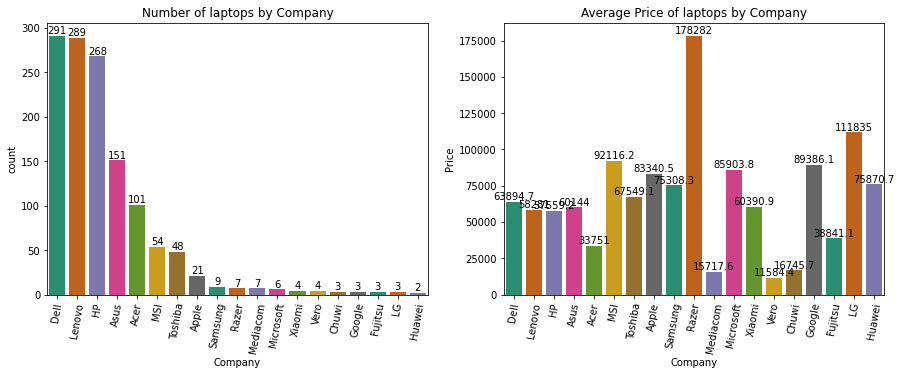

In [9]:
# Funtion to display feature count plot and feature vs. price bar plot
def count_n_price_plot(col1,col2):
    fig, ax  = plt.subplots(figsize=(15,5))
    plt.subplot(1,2,1)
    ax=sns.countplot(x=col1, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col1].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
    ax.bar_label(ax.containers[0])
    plt.title('Number of laptops by {0}'.format(col1))

    plt.subplot(1,2,2)
    ax=sns.barplot( x=col1, 
                    y=col2, 
                    data=data,
                    order=data[col1].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    plt.xticks(rotation=80)
    ax.bar_label(ax.containers[0])
    plt.title('Average {1} of laptops by {0}'.format(col1,col2))
    plt.show()


count_n_price_plot('Company','Price')

## 3. Preprocessing on 'TypeName' field:

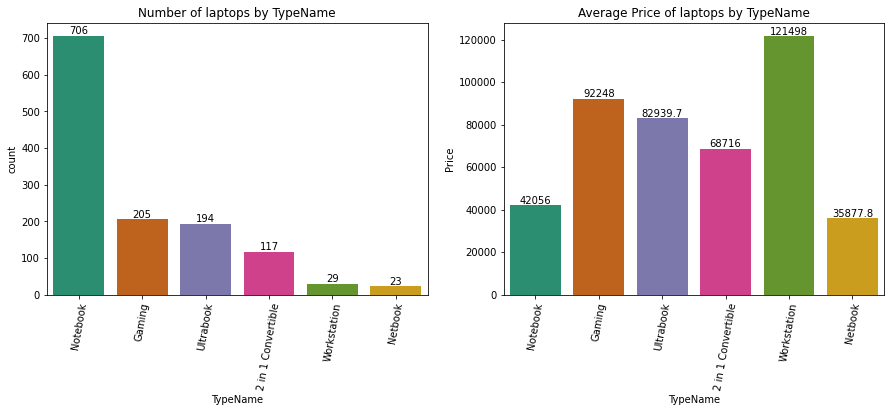

In [10]:
count_n_price_plot('TypeName','Price')

## 4. Preprossing on 'Inches' field:

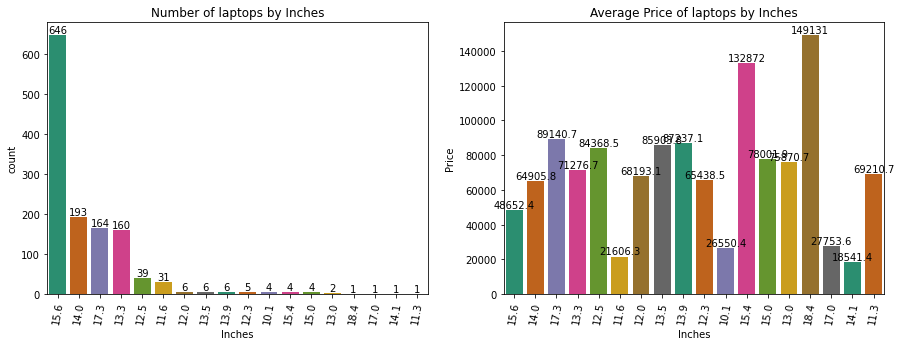

In [11]:
count_n_price_plot('Inches','Price')

## 5. Preprocessing on 'ScreenResolution' field:

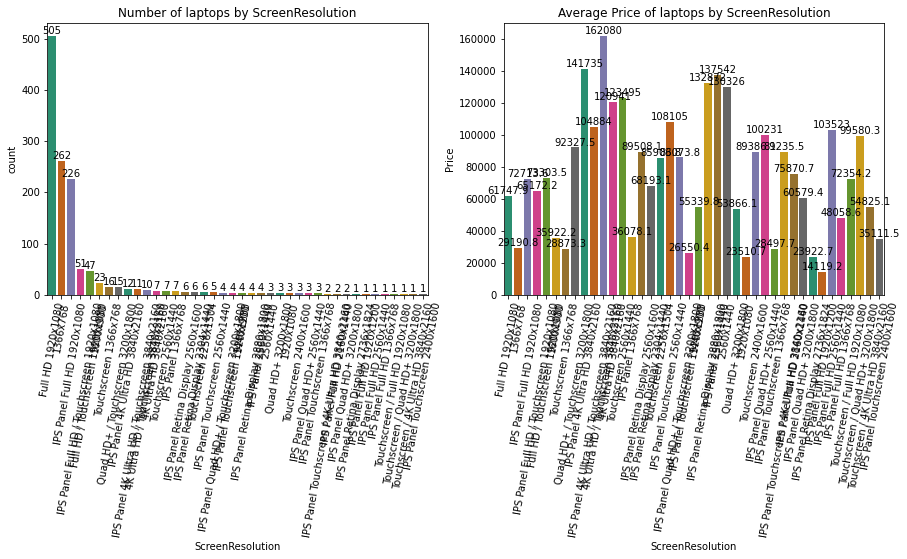

In [12]:
count_n_price_plot('ScreenResolution','Price')

In [13]:
# Use groupby() function
data.groupby(['ScreenResolution']).count().sort_values(by='ScreenResolution')

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
ScreenResolution,,,,,,,,,,
1366x768,262,262,262,262,262,262,262,262,262,262
1440x900,4,4,4,4,4,4,4,4,4,4
1600x900,23,23,23,23,23,23,23,23,23,23
1920x1080,3,3,3,3,3,3,3,3,3,3
2560x1440,3,3,3,3,3,3,3,3,3,3
4K Ultra HD / Touchscreen 3840x2160,10,10,10,10,10,10,10,10,10,10
4K Ultra HD 3840x2160,7,7,7,7,7,7,7,7,7,7
Full HD / Touchscreen 1920x1080,47,47,47,47,47,47,47,47,47,47
Full HD 1920x1080,505,505,505,505,505,505,505,505,505,505


- We have screen resolutions and display technology together in one field.
- Full HD, Quad HD+, 4K Ultra HD are HD screen technologies.
- IPS, Touchscreen are display technologies.
- Some laptop records have only resoltuions data but doesn't have HD screen or display technologies.
- Lets make new columns for all screen resolution and display technologies.

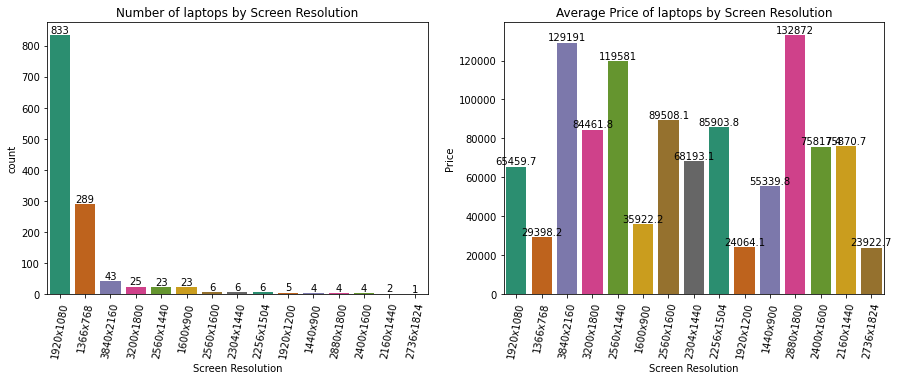

In [14]:
new = data['ScreenResolution'].str.split('x',n=1,expand=True)
new[0] = new[0].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data['Screen Resolution'] = (new[0]+'x'+new[1])
data['X_res'] = new[0]
data['Y_res'] = new[1]
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

count_n_price_plot('Screen Resolution','Price')
# count_n_price_plot('X_res','Price')
# count_n_price_plot('Y_res','Price')

In [15]:
# New Column: Full HD
data['fullhd1']=data['Screen Resolution'].apply(lambda x:1 if '1366x768' in x else 0)
data['fullhd2']=data['Screen Resolution'].apply(lambda x:1 if '1440x900' in x else 0)
data['fullhd3']=data['Screen Resolution'].apply(lambda x:1 if '1600x900'  in x else 0)
data['fullhd4']=data['Screen Resolution'].apply(lambda x:1 if '1920x1080' in x else 0)
data['Full HD']=(data['fullhd1']+data['fullhd2']+data['fullhd3']+data['fullhd4'])

# New Column: Quad HD+
data['quadhd1']=data['Screen Resolution'].apply(lambda x:1 if '1920x1200' in x else 0)
data['quadhd2']=data['Screen Resolution'].apply(lambda x:1 if '2160x1440' in x else 0)
data['quadhd3']=data['Screen Resolution'].apply(lambda x:1 if '2256x1504' in x else 0)
data['quadhd4']=data['Screen Resolution'].apply(lambda x:1 if '2304x1440' in x else 0)
data['quadhd5']=data['Screen Resolution'].apply(lambda x:1 if '2400x1600' in x else 0)
data['quadhd6']=data['Screen Resolution'].apply(lambda x:1 if '2560x1440' in x else 0)
data['quadhd7']=data['Screen Resolution'].apply(lambda x:1 if '2560x1600' in x else 0)
data['Quad HD+'] = (data['quadhd1']+data['quadhd2']+data['quadhd3']+data['quadhd4']+data['quadhd5']+data['quadhd6']+data['quadhd7'])

# New Column: 4K Ultra HD
data['ultrahd1']=data['Screen Resolution'].apply(lambda x:1 if '2736x1824' in x else 0)
data['ultrahd2']=data['Screen Resolution'].apply(lambda x:1 if '2880x1800' in x else 0)
data['ultrahd3']=data['Screen Resolution'].apply(lambda x:1 if '3200x1800' in x else 0)
data['ultrahd4']=data['Screen Resolution'].apply(lambda x:1 if '3840x2160' in x else 0)
data['4K Ultra HD'] = (data['ultrahd1']+data['ultrahd2']+data['ultrahd3']+data['ultrahd4'])

# New Column: IPS
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
# New Column: TouchScreen
data['Touch Screen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# Drop unnecessary columns
data.drop(columns=['ScreenResolution','fullhd1','fullhd2','fullhd3','fullhd4',
                    'quadhd1','quadhd2','quadhd3','quadhd4','quadhd5','quadhd6','quadhd7',
                    'ultrahd1','ultrahd2','ultrahd3','ultrahd4'], inplace=True)

data.groupby(['Full HD','4K Ultra HD','Quad HD+']).count().sort_values(by='Full HD')


Company  TypeName  Inches   Cpu   Ram  Memory  \
Full HD 4K Ultra HD Quad HD+                                                  
0       0           1              52        52      52    52    52      52   
        1           0              73        73      73    73    73      73   
1       0           0            1149      1149    1149  1149  1149    1149   

                               Gpu  OpSys  Weight  Price  Screen Resolution  \
Full HD 4K Ultra HD Quad HD+                                                  
0       0           1           52     52      52     52                 52   
        1           0           73     73      73     73                 73   
1       0           0         1149   1149    1149   1149               1149   

                              X_res  Y_res   IPS  Touch Screen  
Full HD 4K Ultra HD Quad HD+                                    
0       0           1            52     52    52            52  
        1           0            73     73    73            73  
1       0           0          1149   1149  1149          1149

- 52 and 73 laptops have Quad HD+ and 4K Ultra HD screen technology.
- Remaining laptops have Full HD screen technology.
- Lets see IPS Screen and Touch Screen display technology.

In [16]:
data.groupby(['IPS','Touch Screen']).count().sort_values(by='Touch Screen')

,,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen Resolution,X_res,Y_res,Full HD,Quad HD+,4K Ultra HD
IPS,Touch Screen,,,,,,,,,,,,,,,,
0,0,810,810,810,810,810,810,810,810,810,810,810,810,810,810,810,810
1,0,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276,276
0,1,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
1,1,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81


- Only 81 laptops have both IPS and TouchScreen Display Technology.
- While 383 laptops have one of the above Display Technology.

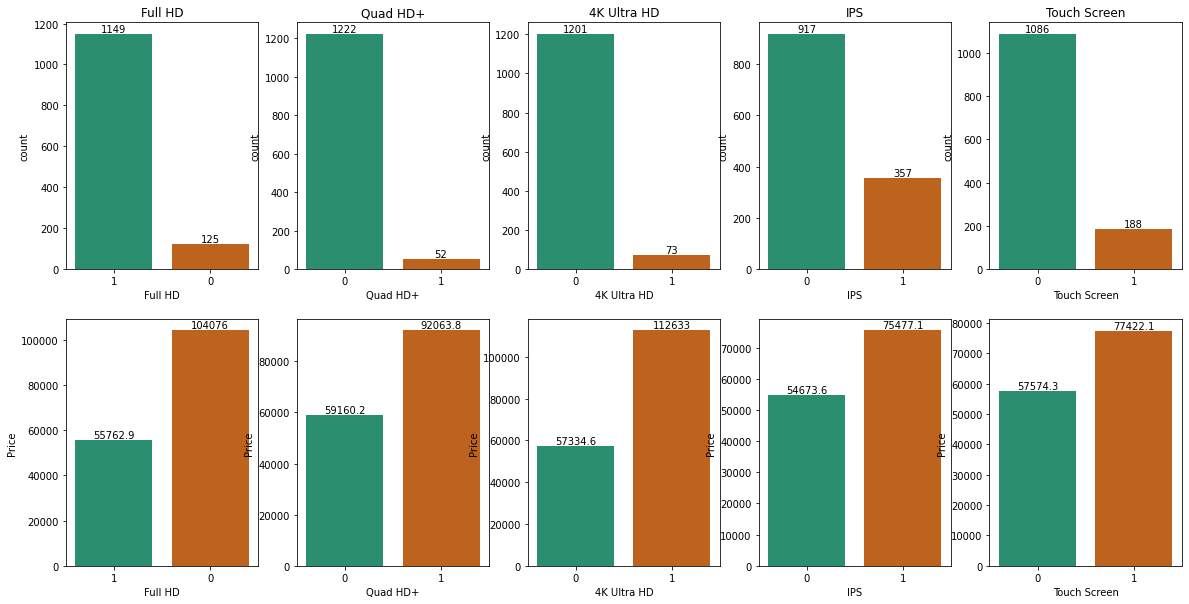

In [17]:
# function to plot count and average price plot in subplots for 'Full HD',
# 'Quad HD+','4K Ultra HD','IPS','Touch Screen','Price' features.

def tech_count_n_price_plot(col1,col2,col3,col4,col5,col6):
    fig, ax  = plt.subplots(figsize=(20,10))
    plt.subplot(2,5,1)
    ax=sns.countplot(x=col1, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col1].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col1)

    plt.subplot(2,5,2)
    ax=sns.countplot(x=col2, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col2].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col2)
    
    plt.subplot(2,5,3)
    ax=sns.countplot(x=col3, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col3].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col3)
    
    plt.subplot(2,5,4)
    ax=sns.countplot(x=col4, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col4].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col4)
    
    plt.subplot(2,5,5)
    ax=sns.countplot(x=col5, 
                    data=data, 
                    palette='Dark2', 
                    order = data[col5].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col5)
    
    plt.subplot(2,5,6)
    ax=sns.barplot( x=col1, 
                    y=col6, 
                    data=data,
                    order=data[col1].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    ax.bar_label(ax.containers[0])

    plt.subplot(2,5,7)
    ax=sns.barplot( x=col2, 
                    y=col6, 
                    data=data,
                    order=data[col2].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    ax.bar_label(ax.containers[0])

    plt.subplot(2,5,8)
    ax=sns.barplot( x=col3, 
                    y=col6, 
                    data=data,
                    order=data[col3].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    ax.bar_label(ax.containers[0])
            
    plt.subplot(2,5,9)
    ax=sns.barplot( x=col4, 
                    y=col6, 
                    data=data,
                    order=data[col4].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    ax.bar_label(ax.containers[0])

    plt.subplot(2,5,10)
    ax=sns.barplot( x=col5, 
                    y=col6, 
                    data=data,
                    order=data[col5].value_counts().index, 
                    palette='Dark2', 
                    ci=False)
    ax.bar_label(ax.containers[0])
            
    plt.show()


tech_count_n_price_plot('Full HD','Quad HD+','4K Ultra HD','IPS','Touch Screen','Price')

## 6. Preprocessing on 'Cpu' field.

In [18]:
data['Cpu'].value_counts().sample(10)

Intel Atom x5-Z8550 1.44GHz             4
Intel Core i7 2.8GHz                    1
Intel Core i7 7Y75 1.3GHz               5
AMD E-Series 9000e 1.5GHz               1
Intel Core M m3 1.2GHz                  1
AMD E-Series 9000 2.2GHz                1
Intel Pentium Quad Core N3700 1.6GHz    2
AMD E-Series E2-9000e 1.5GHz            2
Intel Celeron Dual Core 3205U 1.5GHz    4
Intel Pentium Dual Core 4405U 2.1GHz    1
Name: Cpu, dtype: int64

In [19]:
# Lets split 'Cpu' field and take first 3 words only.
data['CPU Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
data['CPU Name'].value_counts()

Intel Core i7               515
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           69
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
Intel Atom x5-Z8300           1
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD FX 8800P                  1
AMD A4-Series 7210            1
AMD A12-Series 9700P          1
AMD A6-S

In [20]:
def fetch_processor1(text):
    if text.split()[0] == 'AMD':
        return (text.split()[0]+" "+text.split()[1])
    else:
        return text

data['CPU Name'] = data['CPU Name'].apply(fetch_processor1)
data['CPU Name'].value_counts()

Intel Core i7             515
Intel Core i5             423
Intel Core i3             134
Intel Celeron Dual         69
Intel Pentium Quad         27
Intel Core M               17
AMD A9-Series              15
AMD A6-Series              11
AMD E-Series                9
Intel Celeron Quad          8
AMD A12-Series              8
AMD A10-Series              6
Intel Atom x5-Z8350         5
AMD A8-Series               4
Intel Atom x5-Z8550         4
AMD Ryzen                   4
Intel Pentium Dual          3
Intel Xeon E3-1505M         2
AMD FX                      2
Intel Xeon E3-1535M         2
Intel Atom X5-Z8350         2
Intel Atom x5-Z8300         1
Intel Atom Z8350            1
AMD A4-Series               1
Samsung Cortex A72&A53      1
Name: CPU Name, dtype: int64

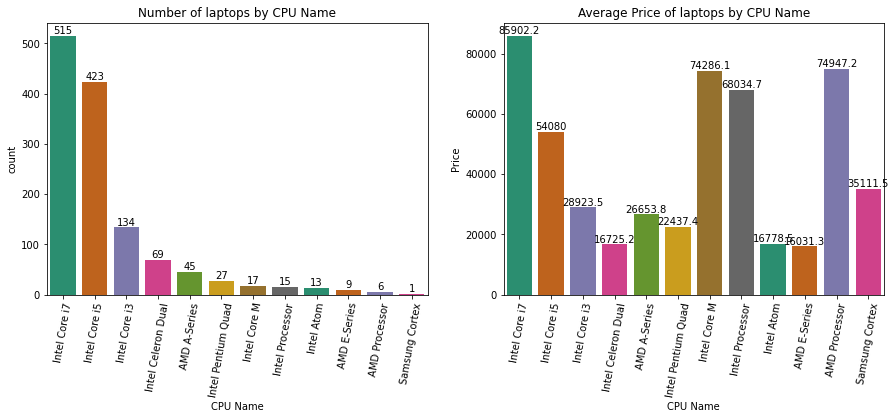

In [21]:
# funtion to return specific or most frequent CPU processor.
def fetch_processor2(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3', 'Intel Celeron Dual', 'Intel Pentium Quad',
                'Intel Core M',]:
        return text
    elif text in ['AMD A9-Series','AMD A6-Series','AMD A12-Series','AMD A10-Series','AMD A8-Series','AMD A4-Series']:
        return 'AMD A-Series'
    else:
        if text.split()[1] == 'Atom':
            return 'Intel Atom'
        elif text.split()[1] == 'E-Series':
            return 'AMD E-Series'
        elif text.split()[0] == 'Intel':
            return 'Intel Processor'
        elif text.split()[0] == 'AMD':
            return 'AMD Processor'    
        else:
            return (text.split()[0]+" "+text.split()[1])

data['CPU Name'] = data['CPU Name'].apply(fetch_processor2)

count_n_price_plot('CPU Name','Price')

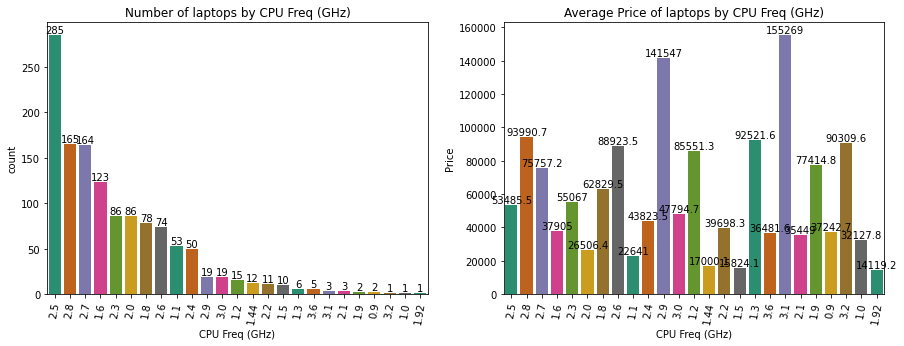

In [22]:
# New CPU frequency column
new2 = data['Cpu'].str.extract(r'(\d+\.\d+GHz|\d+GHz)')
data['CPU Freq (GHz)'] = new2[0].str.replace('GHz','').astype(float)
count_n_price_plot('CPU Freq (GHz)','Price')

data.drop(columns='Cpu',inplace=True)

## 7. Preprocessing on 'Ram' field.

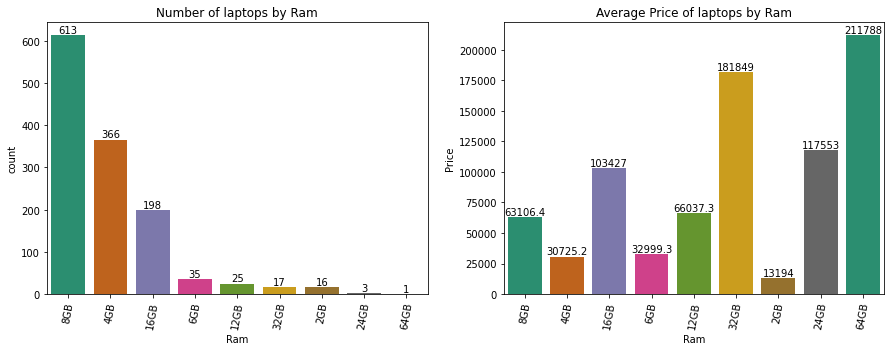

In [23]:
count_n_price_plot('Ram','Price')

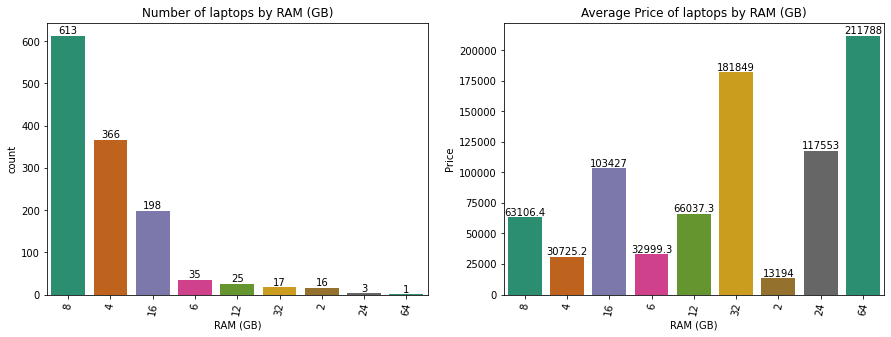

In [24]:
data['RAM (GB)'] = data['Ram'].str.replace("GB", "").astype(int)  # Converting object data type to int data type
count_n_price_plot('RAM (GB)','Price')
data.drop(columns=['Ram'],inplace=True)

## 8. Preprocessing on 'Memory' field.

In [25]:
data['Memory'].value_counts().sample(20)

1TB SSD +  1TB HDD                 2
1.0TB Hybrid                       7
512GB SSD                        114
64GB SSD                           1
256GB Flash Storage                8
1TB HDD                          215
512GB SSD +  2TB HDD               3
180GB SSD                          5
240GB SSD                          1
32GB SSD                           6
128GB SSD +  1TB HDD              94
256GB SSD                        412
256GB SSD +  1TB HDD              73
512GB SSD +  1TB HDD              14
1.0TB HDD                          1
2TB HDD                           16
500GB HDD                        123
16GB SSD                           3
64GB Flash Storage +  1TB HDD      1
512GB SSD +  1.0TB Hybrid          1
Name: Memory, dtype: int64

- Laptops have one or more type of Memories.
- There are two units of memory and are GB and TB, so we will convert TB in to 1000 GB. Thus GB will be common memory unit for all laptop.
- After unit conversion we will remove 'GB' because we want int data type column.

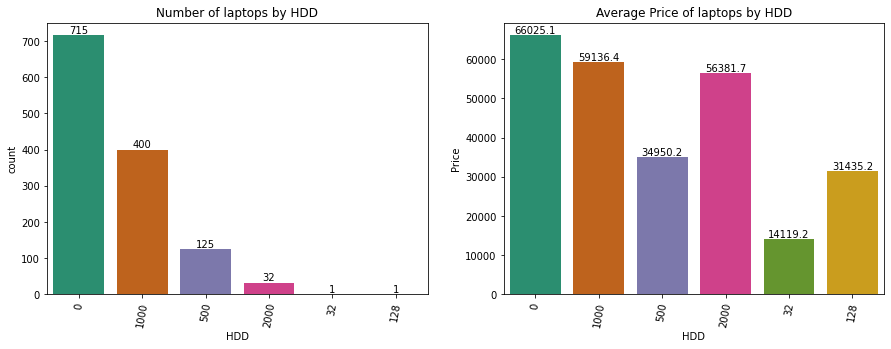

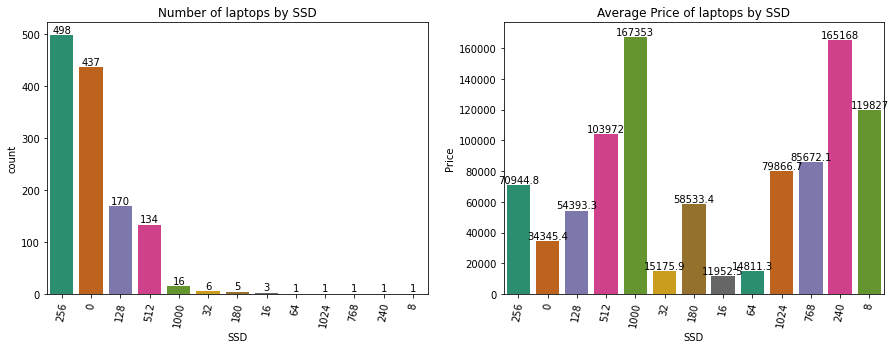

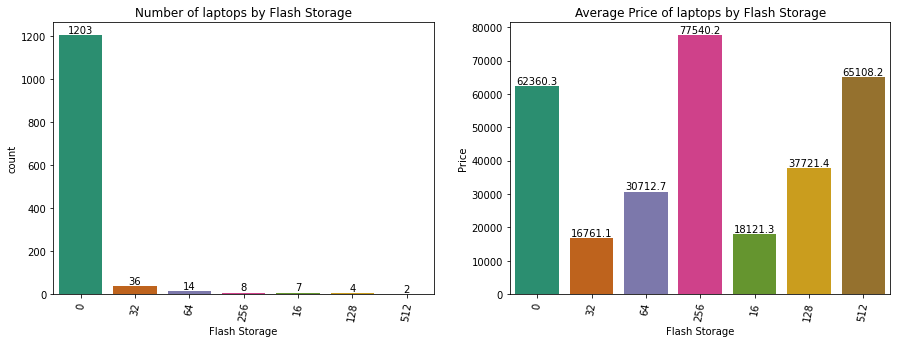

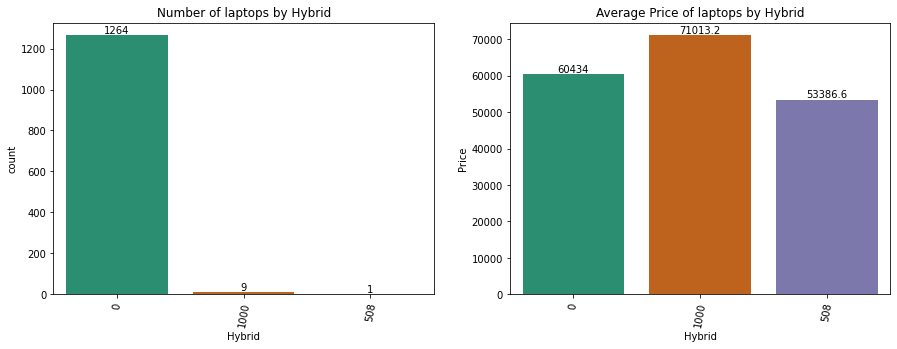

In [26]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)  # replacing '1.0TB' to '1TB'
data['Memory'] = data['Memory'].str.replace('GB', '')   # replacing 'GB' to '' e.g., '512GB' to '512'
data['Memory'] = data['Memory'].str.replace('TB', '000')# replacing 'TB' to '000' e.g., '1TB' to '1000'
new3 = data['Memory'].str.split('+', n=1, expand=True)  # Split data that contains two memory type e.g., '512 SSD + 1000 HDD' to ['512 SSD', '1000 HDD']

data['first'] = new3[0]     # Naming 0th index  of list as 'first' and 1st indes as 'second'
data['second'] = new3[1]
data['second'].fillna("0", inplace=True) # Replace None value with "0"

data['Layer1HDD'] = data['first'].apply(lambda x: 1 if "HDD" in x else 0)
data['Layer1SSD'] = data['first'].apply(lambda x: 1 if "SSD" in x else 0)
data['Layer1Hybrid'] = data['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['Layer1Flash_Storage'] = data['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['Layer2HDD'] = data['second'].apply(lambda x: 1 if "HDD" in x else 0)
data['Layer2SSD'] = data['second'].apply(lambda x: 1 if "SSD" in x else 0)
data['Layer2Hybrid'] = data['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['Layer2Flash_Storage'] = data['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')  
data['first'] = data['first'].astype(int)

data['second'] = data['second'].str.replace(r'\D', '')
data['second'] = data['second'].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])  
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])  
data["Flash Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])

data.drop(columns=['Memory','first', 'Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                   'second','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'], inplace=True)
                                         
# Plotting bar plot for HDD, SSD, Hybrid, Flash Storage and price comparison
count_n_price_plot('HDD','Price')
count_n_price_plot('SSD','Price')
count_n_price_plot('Flash Storage','Price')
count_n_price_plot('Hybrid','Price')

- A hybrid is a storage drive that combines the large storage capacity of an HDD, with the faster read/write speed of an SSD.
- Data can be written onto either the HDD or the SSD, but it is allocated according to user habits.
- Data that user use infrequently is stored on the HDD
- Data that user use frequently is stored on the SSD

In [27]:
# We will drop Hybrid column and its respective row data.
data = data[(data['Hybrid'] != 1000)]
data = data[(data['Hybrid'] != 508)]
data.drop(columns='Hybrid',inplace=True)
data= data.reset_index(drop=True)

## 9. Preprocessing on 'GPU' field

In [28]:
data['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: Gpu, Length: 109, dtype: int64

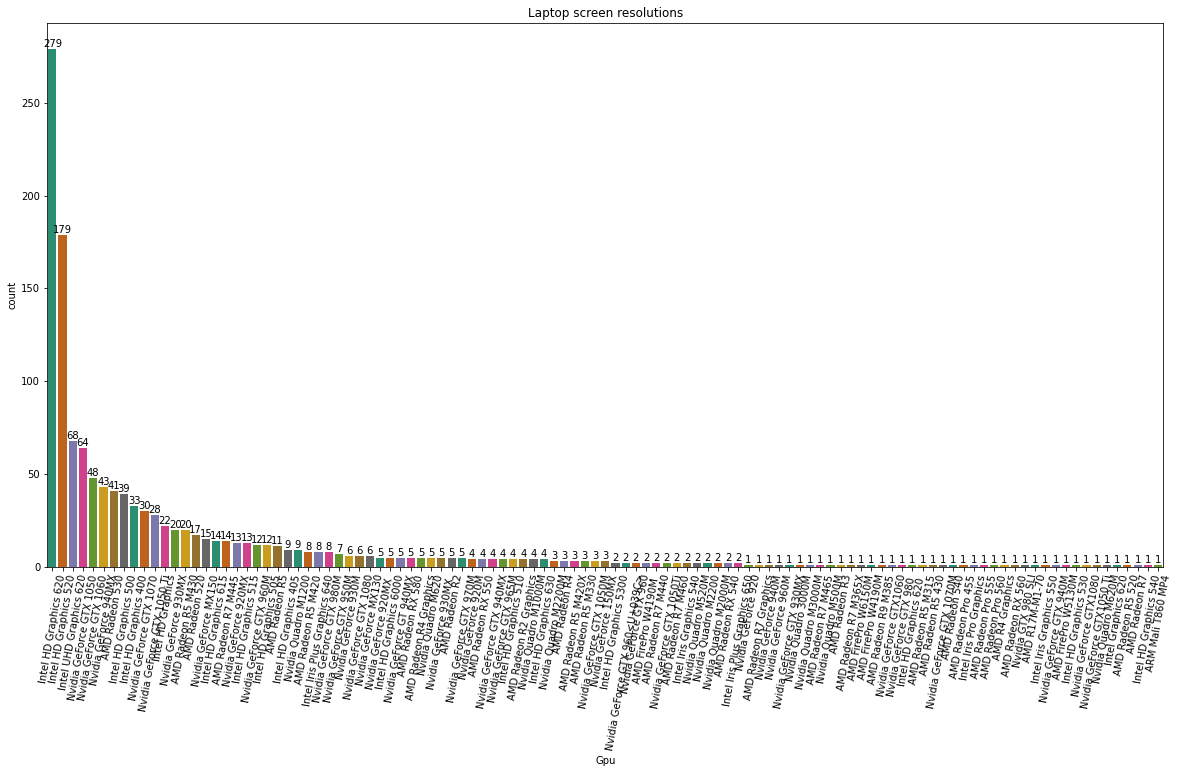

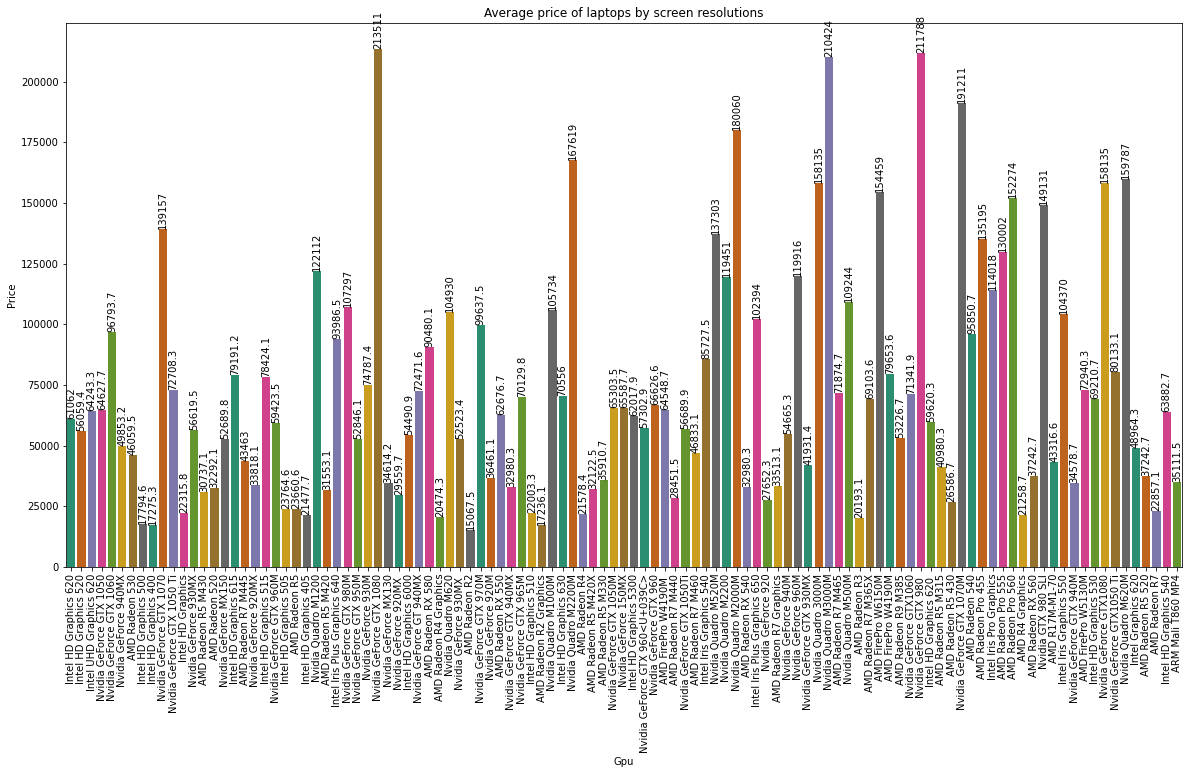

In [29]:
fig, ax  = plt.subplots(figsize=(20,10))
ax=sns.countplot(x='Gpu', data=data, palette='Dark2', order = data['Gpu'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Laptop screen resolutions')
plt.show()

plt.figure(figsize=(20,10))
ax=sns.barplot(x='Gpu', y='Price',
                data=data,
                order=data['Gpu'].value_counts().index, 
                palette='Dark2', 
                ci=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0], rotation=90)
plt.title('Average price of laptops by screen resolutions')
plt.show()

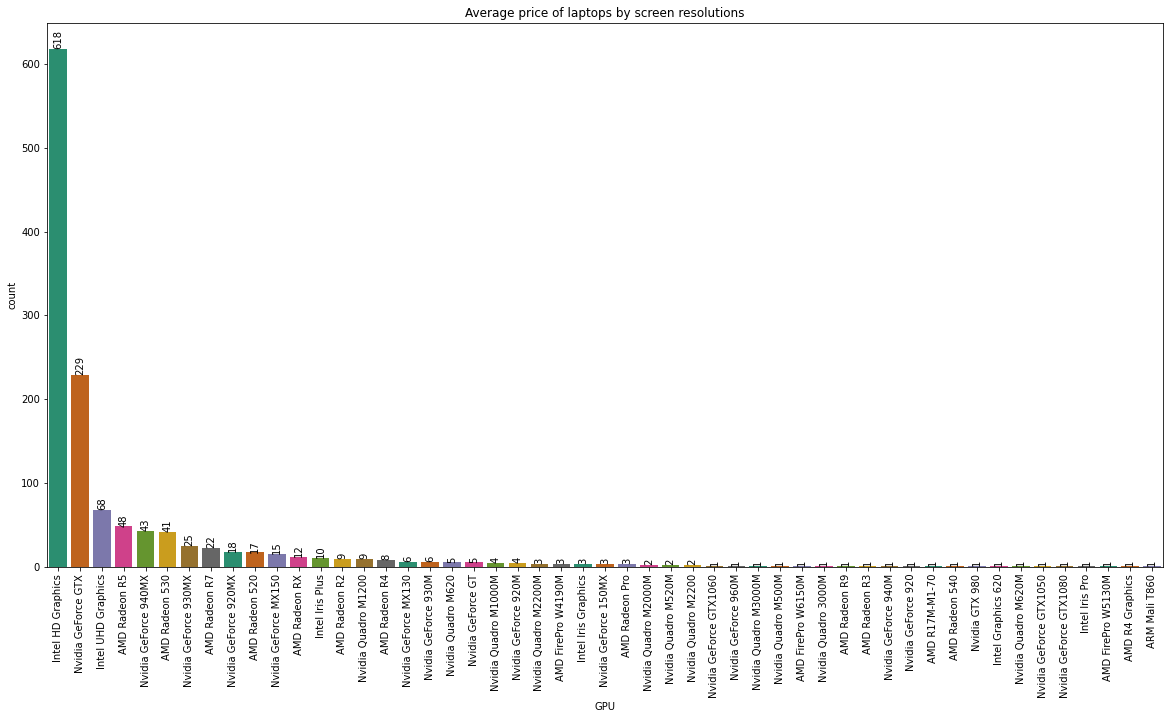

In [30]:
data['GPU'] = data['Gpu'].apply(lambda x:" ".join(x.split()[0:3]))

plt.figure(figsize=(20,10))
ax=sns.countplot(x='GPU',data=data,palette='Dark2',order=data['GPU'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.bar_label(ax.containers[0], rotation=90)
plt.title('Average price of laptops by screen resolutions')
plt.show()

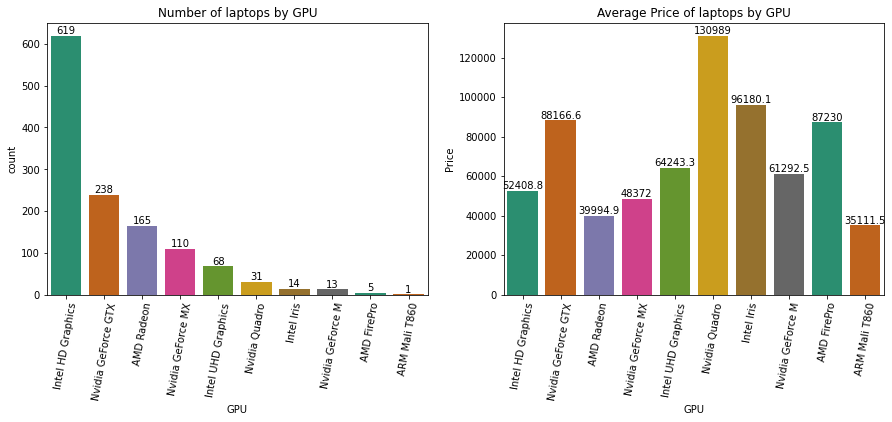

In [31]:
# funtion to return specific or most frequent GPU.
def fetch_gpu(text):
    if text in ['Intel HD Graphics','Intel UHD Graphics']:
        return text

    elif text in ['Intel Graphics 620']:
        return 'Intel HD Graphics'

    elif text in ['Intel Iris Pro','Intel Iris Graphics','Intel Iris Plus']:
        return 'Intel Iris'

    elif text in['Nvidia GeForce GTX','Nvidia GeForce GT','Nvidia GeForce GTX1050',
                'Nvidia GeForce GTX1060','Nvidia GeForce GTX1080','Nvidia GTX 980']:
        return 'Nvidia GeForce GTX' 

    elif text in['Nvidia GeForce 940MX', 'Nvidia GeForce 930MX','Nvidia GeForce 150MX',
                'Nvidia GeForce MX130','Nvidia GeForce MX150','Nvidia GeForce 920MX']:
        return 'Nvidia GeForce MX'

    elif text in['Nvidia GeForce 940M','Nvidia GeForce 960M','Nvidia GeForce 930M',
                'Nvidia GeForce 920M','Nvidia GeForce 920']:
        return 'Nvidia GeForce M'

    elif text.split()[1] == 'Quadro':
        return 'Nvidia Quadro'

    elif text.split()[1] == 'Radeon':
        return 'AMD Radeon'

    elif text in ['AMD R4 Graphics','AMD R17M-M1-70']:
        return 'AMD Radeon'
        
    elif text.split()[1] == 'FirePro':
        return 'AMD FirePro'
    else:   
        if text.split()[0] == 'Intel':
            return 'Intel GPU'
        elif text.split()[0] == 'Nvidia':
            return 'Nvidia GPU' 
        elif text.split()[0] == 'AMD':
            return 'AMD GPU'
        else:
            return text
data['GPU'] = data['GPU'].apply(fetch_gpu)

count_n_price_plot('GPU','Price')
data.drop(columns='Gpu',inplace=True)

## 10. Preprocessing on 'OpSys' field

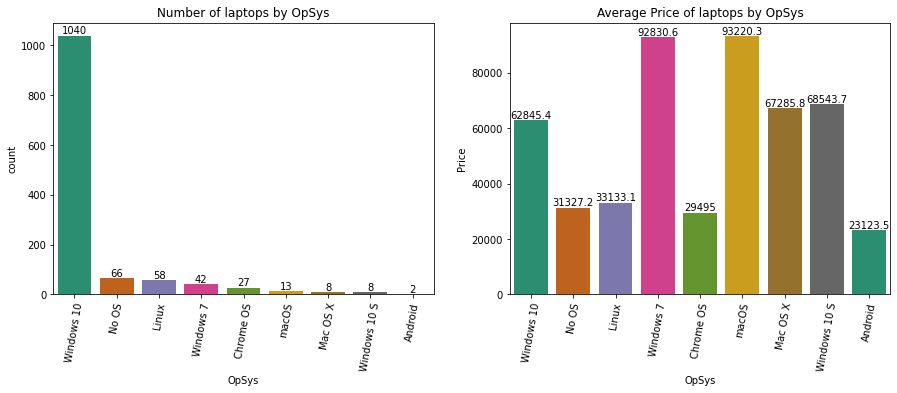

In [32]:
count_n_price_plot('OpSys','Price')

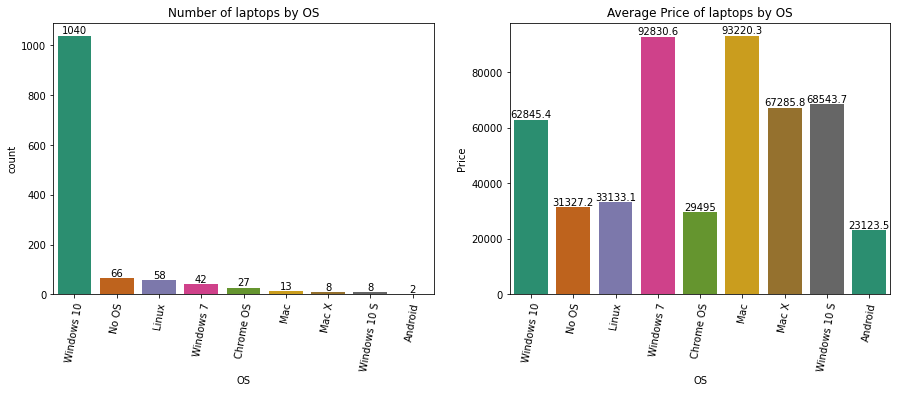

In [33]:
def fetch_os(x):
    if x == 'macOS':
        return 'Mac'
    elif x == 'Mac OS X':
        return 'Mac X'
    else:
        return x
data['OS'] = data['OpSys'].apply(fetch_os)

count_n_price_plot('OS','Price')
data.drop(columns='OpSys',inplace=True)

## 11. Preprocessing on 'Weight' field

In [34]:
data['Weight'].value_counts()

2.2kg     116
2.1kg      58
2.4kg      42
2.3kg      37
2.5kg      36
         ... 
1.14kg      1
3.8kg       1
1.19kg      1
1.55kg      1
4.0kg       1
Name: Weight, Length: 178, dtype: int64

In [35]:
data['Weight (kg)'] = data['Weight'].str.replace("kg", "").astype(float) # removing 'kg'and converting object data type to float data type
data.drop(columns='Weight',inplace=True)

In [36]:
# Lets place Price column as last column in dataset
data['Price_New'] = data['Price']
data.drop(columns='Price',inplace=True)
data['Price'] = data['Price_New']
data.drop(columns='Price_New',inplace=True)

## 12. Preprocessing is Completed.

In [37]:
data.head()

,Company,TypeName,Inches,Screen Resolution,X_res,Y_res,Full HD,Quad HD+,4K Ultra HD,IPS,...,CPU Name,CPU Freq (GHz),RAM (GB),HDD,SSD,Flash Storage,GPU,OS,Weight (kg),Price
0,Apple,Ultrabook,13.3,2560x1600,2560,1600,0,1,0,1,...,Intel Core i5,2.3,8,0,128,0,Intel Iris,Mac,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,1440,900,1,0,0,0,...,Intel Core i5,1.8,8,0,0,128,Intel HD Graphics,Mac,1.34,47895.5232
2,HP,Notebook,15.6,1920x1080,1920,1080,1,0,0,0,...,Intel Core i5,2.5,8,0,256,0,Intel HD Graphics,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,2880x1800,2880,1800,0,0,1,1,...,Intel Core i7,2.7,16,0,512,0,AMD Radeon,Mac,1.83,135195.3360
4,Apple,Ultrabook,13.3,2560x1600,2560,1600,0,1,0,1,...,Intel Core i5,3.1,8,0,256,0,Intel Iris,Mac,1.37,96095.8080


## 13. Correlation of Price with other features.

<AxesSubplot:>

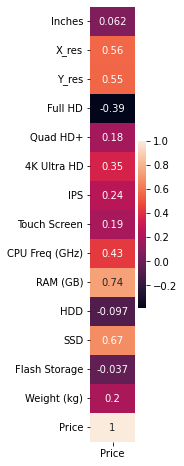

In [38]:
corr_data = pd.DataFrame(data.corr()['Price'])
plt.figure(figsize = (1,8))
sns.heatmap(corr_data,annot=True)

- 'Full HD' feature is inversaly proportional to Price feature (i.e., Negative Relation).
- Feature like Inches, Quad HD+, HDD and Flash Storage have no or zero relation with Price feature.
- Remaining all features are directly proportional to Price and among that RAM (GB) feature has more positive relation with Price compared to other.

## 14. Scatter Plot

### 1. Scatter plot of X_res and Y_res feature with Price feature.

<AxesSubplot:xlabel='Y_res', ylabel='Price'>

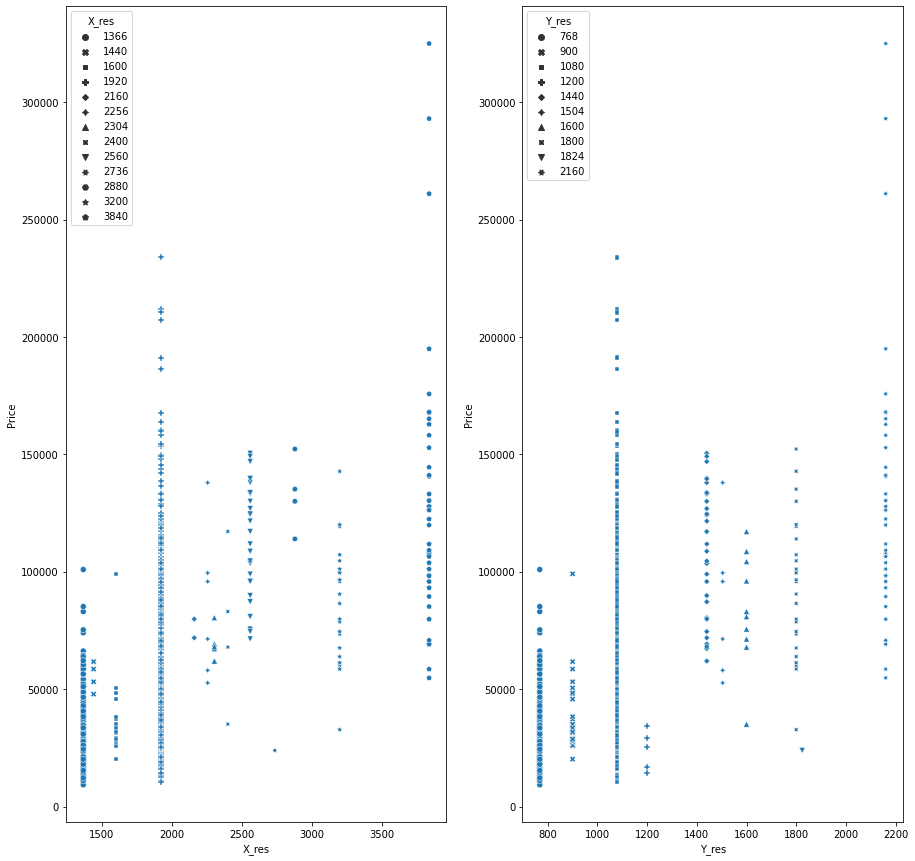

In [39]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
sns.scatterplot(data=data, x="X_res", y="Price", style="X_res")
plt.subplot(1,2,2)
sns.scatterplot(data=data, x="Y_res", y="Price", style="Y_res")

### 2. Scatter plot of CPU Freq(GHz) and RAM (GB) feature with Price feature.

<AxesSubplot:xlabel='RAM (GB)', ylabel='Price'>

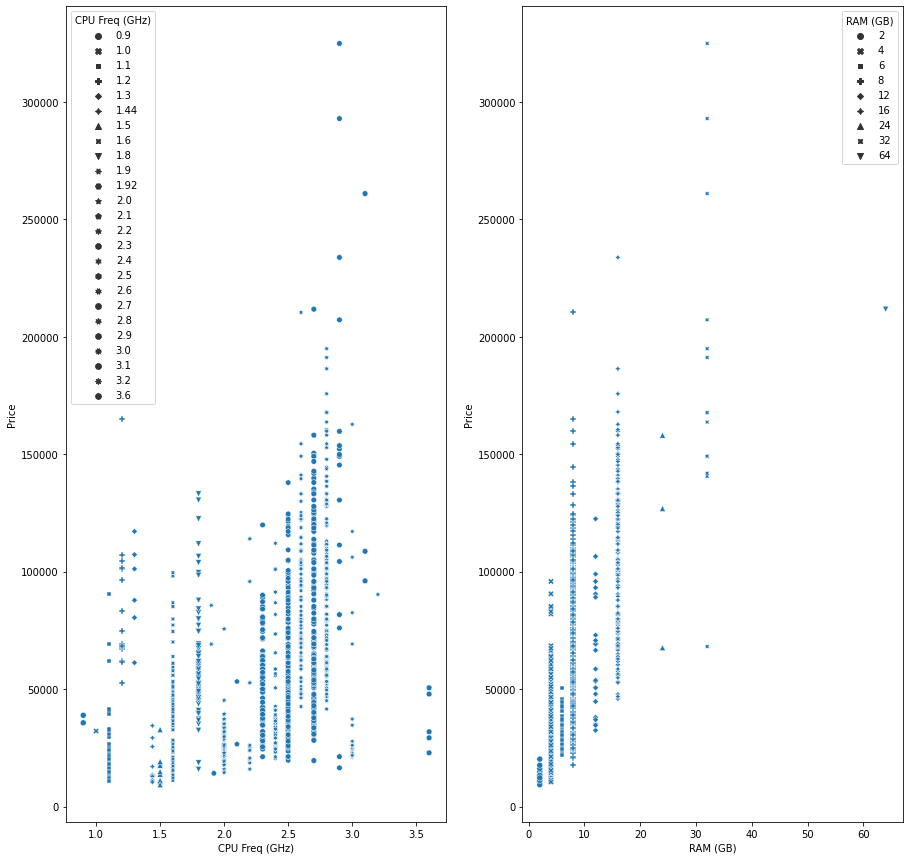

In [40]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
sns.scatterplot(data=data, x="CPU Freq (GHz)", y="Price", style="CPU Freq (GHz)")
plt.subplot(1,2,2)
sns.scatterplot(data=data, x="RAM (GB)", y="Price", style="RAM (GB)")

### 3. Scatter plot of weight feature with Price feature.

<AxesSubplot:xlabel='Weight (kg)', ylabel='Price'>

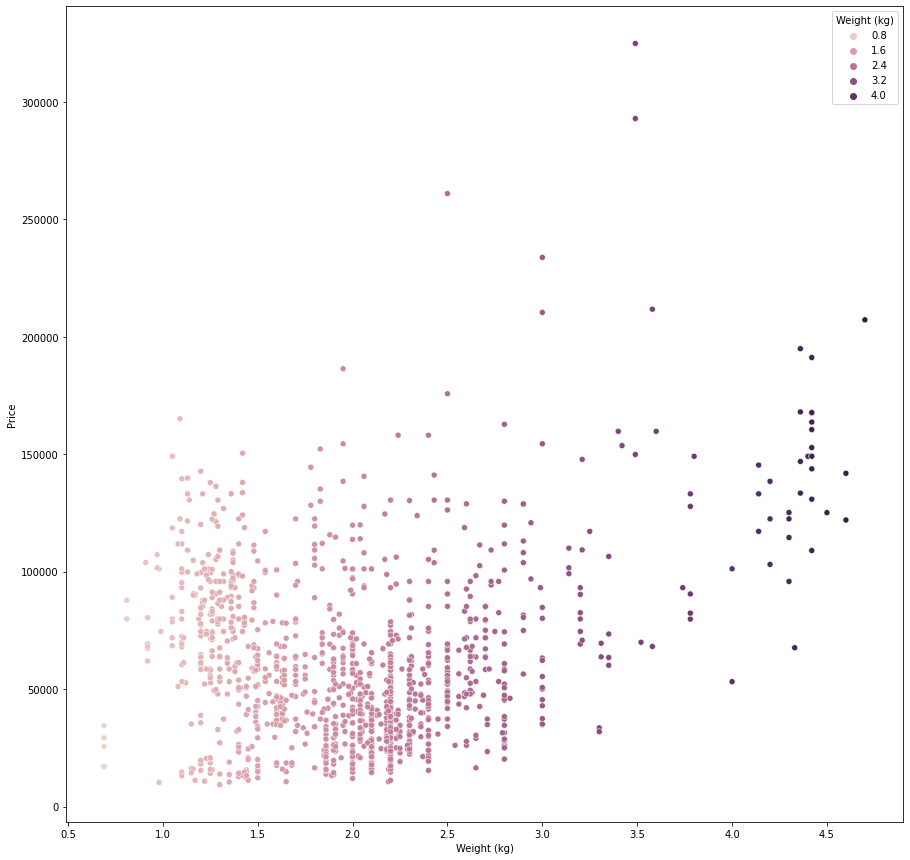

In [41]:
plt.figure(figsize = (15,15))
sns.scatterplot(data=data, x="Weight (kg)", y="Price", hue="Weight (kg)")

# Model Building

## 1. Distribution of target variable i.e. 'Price'

<AxesSubplot:xlabel='Price', ylabel='Density'>

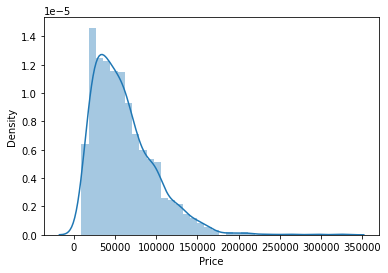

In [42]:
sns.distplot(data['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

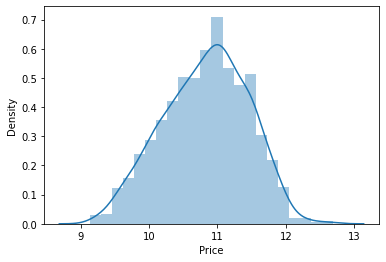

In [43]:
# Taking log of price field to get normal distribution.
data['Price'] = (np.log(data['Price']))
sns.distplot(data['Price'])

## 2. Split dataset into independent and dependent data.

In [44]:
# Consider the input and output columns from a dataset
# Consider x as independent data and y as dependent data 
x = data.drop(columns=['Price','Screen Resolution']) 
y = data['Price']
print('Dependent data - Price',y.head())
print('Independent data - ',)
x.head()

Dependent data - Price 0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64
Independent data - 


,Company,TypeName,Inches,X_res,Y_res,Full HD,Quad HD+,4K Ultra HD,IPS,Touch Screen,CPU Name,CPU Freq (GHz),RAM (GB),HDD,SSD,Flash Storage,GPU,OS,Weight (kg)
0,Apple,Ultrabook,13.3,2560,1600,0,1,0,1,0,Intel Core i5,2.3,8,0,128,0,Intel Iris,Mac,1.37
1,Apple,Ultrabook,13.3,1440,900,1,0,0,0,0,Intel Core i5,1.8,8,0,0,128,Intel HD Graphics,Mac,1.34
2,HP,Notebook,15.6,1920,1080,1,0,0,0,0,Intel Core i5,2.5,8,0,256,0,Intel HD Graphics,No OS,1.86
3,Apple,Ultrabook,15.4,2880,1800,0,0,1,1,0,Intel Core i7,2.7,16,0,512,0,AMD Radeon,Mac,1.83
4,Apple,Ultrabook,13.3,2560,1600,0,1,0,1,0,Intel Core i5,3.1,8,0,256,0,Intel Iris,Mac,1.37


## 3. Split independent and dependent dataset into training and testing dataset

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, random_state= 5, test_size=0.25)
print("Total no. of Input Training examples:", len(x_train))
print("Total no. of Input Testing examples:", len(x_test))
print("Total no. of Output Training examples:", len(y_train))
print("Total no. of Output Testing examples:", len(y_test))

Total no. of Input Training examples: 948
Total no. of Input Testing examples: 316
Total no. of Output Training examples: 948
Total no. of Output Testing examples: 316


## 4. Encoding categorical data using One Hot Encoding

In [46]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 1234 to 867
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         948 non-null    object 
 1   TypeName        948 non-null    object 
 2   Inches          948 non-null    float64
 3   X_res           948 non-null    int32  
 4   Y_res           948 non-null    int32  
 5   Full HD         948 non-null    int64  
 6   Quad HD+        948 non-null    int64  
 7   4K Ultra HD     948 non-null    int64  
 8   IPS             948 non-null    int64  
 9   Touch Screen    948 non-null    int64  
 10  CPU Name        948 non-null    object 
 11  CPU Freq (GHz)  948 non-null    float64
 12  RAM (GB)        948 non-null    int32  
 13  HDD             948 non-null    int64  
 14  SSD             948 non-null    int64  
 15  Flash Storage   948 non-null    int64  
 16  GPU             948 non-null    object 
 17  OS              948 non-null    

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

step1 = ColumnTransformer(transformers= [('clm', OneHotEncoder(sparse=False, handle_unknown = "ignore"),[0,1,10,16,17])], remainder='passthrough')

step2 = LinearRegression()
pipe = Pipeline([('step1', step1), ('step2', step2)])

## 5. Model fitting and accuracy checking

In [48]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('clm',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 10, 16, 17])])),
                ('step2', LinearRegression())])

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error
y_pred = pipe.predict(x_test)
print("R2_Score", r2_score(y_pred, y_test))
print("MAE", mean_absolute_error(y_pred, y_test))

R2_Score 0.8280655894750204
MAE 0.18009803669204968


In [50]:
from sklearn.linear_model import LinearRegression
lmr = LinearRegression()

from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=3) 

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=12)

from sklearn.svm import SVR
svmr = SVR(kernel='rbf', C=1000, epsilon=0.1)  

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=350, random_state=0, max_depth=15)

from sklearn.ensemble import VotingRegressor
step2 = VotingRegressor([('LM', lmr), ('KNN', knnr), ('DcT', dtr), ('SVM', svmr), ('RF',rfr)], weights=[5,1,1,1,1]) # weight is constant parameter assaign any value

pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2_Score", r2_score(y_pred, y_test))
print("MAE", mean_absolute_error(y_pred, y_test))

R2_Score 0.8537797931761528
MAE 0.16251265535153578


In [51]:
import pickle
data['Price'] = (np.exp(data['Price']))
data.to_csv(r'/laptop dataset/output/processed_laptop_dataset.csv')
pickle.dump(data, open(r'/laptop dataset/pickle file/processed_data.pickle', 'wb'))
pickle.dump(pipe, open(r'/laptop dataset/pickle file/ml_model_pipe.pickle', 'wb'))

## 6. Price prediction example

In [52]:
x.sample()

,Company,TypeName,Inches,X_res,Y_res,Full HD,Quad HD+,4K Ultra HD,IPS,Touch Screen,CPU Name,CPU Freq (GHz),RAM (GB),HDD,SSD,Flash Storage,GPU,OS,Weight (kg)
415,Dell,Notebook,13.3,1366,768,1,0,0,0,0,Intel Core i3,2.0,4,0,128,0,Intel HD Graphics,Windows 10,1.65


In [53]:
# 1.0 Specification input using dictionary : 
# 1.1 Creating a dataframe from dictionary.
# Create variables and add corresponding values in it.

comp = 'Dell'
type = 'Notebook'
inch = 15.6
xres = 1920
yres = 1080
fullhd = 1
quadhd = 0
ultra4khd = 0
ips = 1
touchscreen = 0
cpu = 'Intel Core i5'
cpufreq = 2.2
ram = 12
hdd = 1000
ssd = 0
flash_storage = 0
gpu = 'Nvidia GeForce M'
os = 'Windows 10'
weight = 1.76

# Create a dictionary such that keys sequence must be same as our trained dataset.
# Assign above variables as key values. 
dict_for_df = {
                'Company': comp,
                'TypeName': type,
                'Inches': inch,
                'X_res': xres,
                'Y_res': yres,
                'Full HD': fullhd,
                'Quad HD+': quadhd,
                '4K Ultra HD': ultra4khd,
                'IPS': ips,
                'Touch Screen': touchscreen,
                'CPU Name': cpu,
                'CPU Freq (GHz)': cpufreq,
                'RAM (GB)': ram,
                'HDD': hdd,
                'SSD': ssd,
                'Flash Storage': flash_storage,
                'GPU': gpu,
                'OS': os,
                'Weight (kg)': weight
               }

# Now convert dictionary into dataframe.
df= pd.DataFrame(dict_for_df,index=[0])
price_pred = str(int(np.exp(pipe.predict(df))))       
print("Your Laptop price is ₹ {0}/-".format(price_pred))

Your Laptop price is ₹ 47870/-


In [54]:
# 1.2 Create a dictionary such that keys sequence must be same as our trained dataset.
# Directly assign corresponding specifications as key values.

dict_for_df = {
              'Company': 'Dell',
              'TypeName': 'Notebook',
              'Inches': 15.6,
              'X_res': 1920,
              'Y_res': 1080,
              'Full HD': 1,
              'Quad HD+': 0,
              '4K Ultra HD': 0, 
              'IPS': 1, 
              'Touch Screen': 0, 
              'CPU Name': 'Intel Core i5', 
              'CPU Freq (GHz)': 2.2, 
              'RAM (GB)': 12, 
              'HDD': 1000, 
              'SSD': 0, 
              'Flash Storage': 0, 
              'GPU': 'Nvidia GeForce M', 
              'OS': 'Windows 10', 
              'Weight (kg)': 1.76
              }

# Now convert dictionary into dataframe.
df= pd.DataFrame(dict_for_df,index=[0])
price_pred = str(int(np.exp(pipe.predict(df))))       
print("Your Laptop price is ₹ {0}/-".format(price_pred))

Your Laptop price is ₹ 47870/-


In [55]:
# 2.0 Specification input using nested list : 
# Create a nested list and assign specification values such that sequence must be same as our trained dataset
spec = [['Dell', 'Notebook', 15.6,1920,1080, 1, 0, 0, 0, 0, 'Intel Core i5',2.2, 12, 1000, 0, 0, 'Nvidia GeForce M', 'Windows 10', 1.76]]

# Input the 0th index list from nested list.
price_pred = str(int(np.exp(pipe.predict(spec)[0])))
print("Your Laptop price is ₹ {0}/-".format(price_pred))

Your Laptop price is ₹ 46959/-


In [56]:
spec = ['Asus', 'Gaming', 15.6,3200,1800, 0, 0, 1, 1, 0, 'Intel Core i5',2.4, 8, 0, 512, 0, 'Nvidia GeForce GTX', 'Windows 10', 2.5]
spec = [spec] 
price_pred = str(int(np.exp(pipe.predict(spec)[0])))
print("Your Laptop price is ₹ {0}/-".format(price_pred))

Your Laptop price is ₹ 77164/-
